<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K-Nearest Neighbors (kNN) [Unsupervised]

*Author: Soumya Pal*

*Updated: Stephen Coshatt*

<br/>

**References:**


1.   https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
2.   https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


"The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems." [1]

kNN algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

"The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other." [1]

### The KNN Algorithm  [1]
1.  Load the data
2.  Initialize K to your chosen number of neighbors
3.  For each example in the data
    <ol>
      <li>Calculate the distance between the query example and the current example from the data.</li>
      <li>Add the distance and the index of the example to an ordered collection</li>
    </ol>
4.  Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5.  Pick the first K entries from the sorted collection
6.  Get the labels of the selected K entries
7.  If regression, return the mean of the K labels
8.  If classification, return the mode of the K labels

### Choosing the right value for K
To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before. [1]

Here are some things to keep in mind:


1.   As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green. [1]
2.   Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far. [1]
3.   In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker. [1]


### Pros
*   No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period or derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.
*   Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.
*   KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)
*   Can be used both for Classification and Regression: One of the biggest advantages of K-NN is that K-NN can be used both for classification and regression problems.

### Cons
*   Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing point is huge which degrades the performance of the algorithm.
*   Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with a large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.
*   Requires feature scaling: Feature scaling (standardization and normalization) has to be done before applying KNN algorithm to any dataset, otherwise KNN may generate wrong predictions.
*   Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. So data has to be manipulated to impute missing values and remove outliers.

In [1]:
!pip install influxdb

     |████████████████████████████████| 77 kB 2.6 MB/s 


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


len: 420021
5


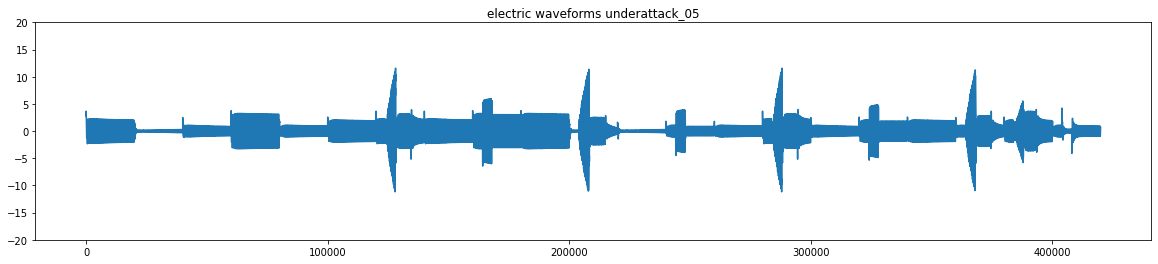

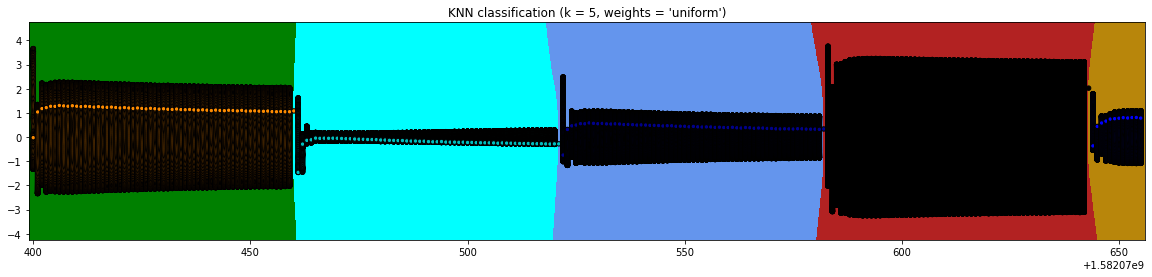

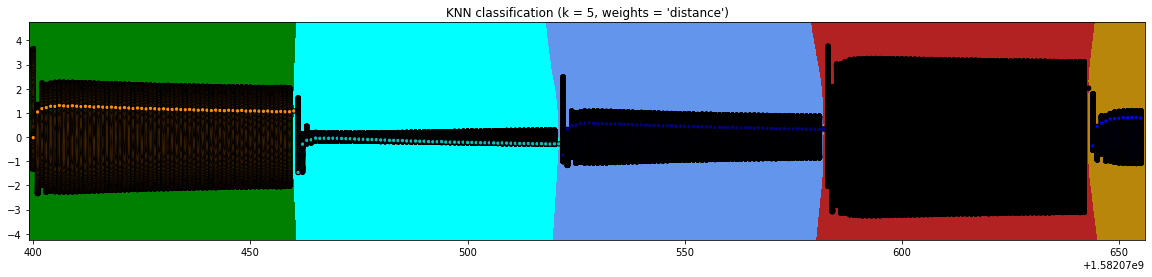

In [2]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from influxdb import InfluxDBClient
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

ip_addr = "sensorweb.us"
user_name = "test"
user_pwd = "sensorweb"
db_name = "waveform"

client = InfluxDBClient(host=ip_addr, port=8086, username=user_name, password=user_pwd, database=db_name, ssl=True)

tag_list = ["attack_01", "attack_07", "attack_08"]

# influxdb query data command
measurement = "sensor_04"
field_key = "Ib"
tag_key = "case"
tag_value = "attack_05"
start_time = "" 
end_time = ""

#query_command = 'SELECT * FROM "' + measurement + \
 #         '"'
#for tag_value in tag_list:
query_command = 'SELECT "'+ field_key + '"::field,"' + tag_key +'"::tag FROM "' + measurement + \
          '"'# WHERE ("'+ tag_key +'" = \''+tag_value+'\') '

#print(query_command)

query_result = client.query(query_command)
#print(query_command)

# points is a list of dictionary
points = list(query_result.get_points())

values =  map(operator.itemgetter(field_key), points)
data1 = list(values)
test =  map(operator.itemgetter(tag_key), points)
labels = list(test)
#print(np.unique(labels))
#print(data.shape)

if(len(data1) == 0):
  print("No data in the chosen time range!")
  quit()
else:
  print("len:", len(data1))

times  =  map(operator.itemgetter('time'),  points)
time = list(times)
time1=[]
cases=[]
for t in time:
    time1.append(str(t))
for l in labels:
    cases.append(l)

#print(time1[0:5])

length = int(len(data1)/5) # print(np.unique(y))


timet = []
i=0
while i < length:
      #print (t)
      if len(time[i])==27:
        temp = datetime.strptime(time[i], "%Y-%m-%dT%H:%M:%S.%fZ")
      elif len(time[i])==20:
        temp = datetime.strptime(time[i], "%Y-%m-%dT%H:%M:%SZ")
      timet.append(temp)
      i+=1


datatemp={'time':[x for x in time1],
      'data':[d for d in data1],
      'case':[c for c in cases]}
dataset=pd.DataFrame(datatemp,columns=['time','data','case'])
fs = 20000 # for electric waveform data, 20KHz
dataset.case = pd.Categorical(dataset.case)
dataset['label'] = dataset.case.cat.codes
#dataset.drop(['case'], axis=1)
del dataset['case']

#print(dataset[90000:90005])

X=np.zeros((length,2),dtype=np.float64)

y=[] #np.zeros((length,1),dtype=np.float64)

i=0
while i<length:
  X[i][0]= int(timet[i].timestamp())
  X[i][1]= dataset['data'][i]
  y.append(dataset['label'][i])
  i+=1

del dataset
print(len(np.unique(y)))


plt.figure(figsize=(20, 4))
#plt.xlim(0,10000)
plt.ylim(-20,20)
plt.title("electric waveforms under" + tag_value)
plt.plot(data1)
plt.show()

mesh_step_size = .02  # step size in the mesh
n_neighbors = len(np.unique(y))

# Create color mapsK
cmap_light = ListedColormap(['green', 'cyan', 'cornflowerblue','firebrick','darkgoldenrod'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue','k','b'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    KNeighbors = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    KNeighbors.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = KNeighbors.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20, 4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNN classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
#a = [[157000, 0.47]]
#KNeighbors.predict(a)